# Rf 6 1 0_Visualerror

Likelihood and minimization: visualization of errors from a covariance matrix




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:00 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Setup example fit
---------------------------------------

Create sum of two Gaussians p.d.f. with factory

In [2]:
x = ROOT.RooRealVar("x", "x", -10, 10)

m = ROOT.RooRealVar("m", "m", 0, -10, 10)
s = ROOT.RooRealVar("s", "s", 2, 1, 50)
sig = ROOT.RooGaussian("sig", "sig", x, m, s)

m2 = ROOT.RooRealVar("m2", "m2", -1, -10, 10)
s2 = ROOT.RooRealVar("s2", "s2", 6, 1, 50)
bkg = ROOT.RooGaussian("bkg", "bkg", x, m2, s2)

fsig = ROOT.RooRealVar("fsig", "fsig", 0.33, 0, 1)
model = ROOT.RooAddPdf("model", "model", ROOT.RooArgList(
    sig, bkg), ROOT.RooArgList(fsig))


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Create binned dataset

In [3]:
x.setBins(25)
d = model.generateBinned(ROOT.RooArgSet(x), 1000)

Perform fit and save fit result

In [4]:
r = model.fitTo(d, ROOT.RooFit.Save())

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (sig,bkg)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 fsig         3.30000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 m            0.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     3 m2          -1.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     4 s            2.00000e+00  5.00000e-01    1.00000e+00  5.00000e+01
     5 s2           6.00000e+00  2.50000e+00    1.00000e+00  5.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD    

Visualize fit error
-------------------------------------

Make plot frame

In [5]:
frame = x.frame(ROOT.RooFit.Bins(40), ROOT.RooFit.Title(
    "P.d.f with visualized 1-sigma error band"))
d.plotOn(frame)

<ROOT.RooPlot object ("frame_x_55dd302f75f0") at 0x55dd302f75f0>

Visualize 1-sigma error encoded in fit result 'r' as orange band using linear error propagation
ROOT.This results in an error band that is by construction symmetric

The linear error is calculated as
error(x) = Z* F_a(x) * Corr(a,a') F_a'(x)

where     F_a(x) = [ f(x,a+da) - f(x,a-da) ] / 2,

        with f(x) = the plotted curve
             'da' = error taken from the fit result
       Corr(a,a') = the correlation matrix from the fit result
               Z = requested significance 'Z sigma band'

The linear method is fast (required 2*N evaluations of the curve, N is the number of parameters),
but may not be accurate in the presence of strong correlations (~>0.9) and at Z>2 due to linear and
Gaussian approximations made

In [6]:
model.plotOn(frame, ROOT.RooFit.VisualizeError(
    r, 1), ROOT.RooFit.FillColor(ROOT.kOrange))

<ROOT.RooPlot object ("frame_x_55dd302f75f0") at 0x55dd302f75f0>

Calculate error using sampling method and visualize as dashed red line.

In self method a number of curves is calculated with variations of the parameter values, sampled
from a multi-variate Gaussian p.d.f. that is constructed from the fit results covariance matrix.
The error(x) is determined by calculating a central interval that capture N% of the variations
for each valye of x, N% is controlled by Z (i.e. Z=1 gives N=68%). The number of sampling curves
is chosen to be such that at least 100 curves are expected to be outside the N% interval, is minimally
100 (e.g. Z=1.Ncurve=356, Z=2.Ncurve=2156)) Intervals from the sampling method can be asymmetric,
and may perform better in the presence of strong correlations, may take
(much) longer to calculate

In [7]:
model.plotOn(
    frame,
    ROOT.RooFit.VisualizeError(
        r,
        1,
        ROOT.kFALSE),
    ROOT.RooFit.DrawOption("L"),
    ROOT.RooFit.LineWidth(2),
    ROOT.RooFit.LineColor(
        ROOT.kRed))

<ROOT.RooPlot object ("frame_x_55dd302f75f0") at 0x55dd302f75f0>

[#1] INFO:Plotting -- RooAbsReal::plotOn(model) INFO: visualizing 1-sigma uncertainties in parameters (m,s,fsig,m2,s2) from fit result fitresult_model_genData using 315 samplings.


Perform the same type of error visualization on the background component only.
The VisualizeError() option can generally applied to _any_ kind of
plot (components, asymmetries, etc..)

In [8]:
model.plotOn(
    frame, ROOT.RooFit.VisualizeError(
        r, 1), ROOT.RooFit.FillColor(
            ROOT.kOrange), ROOT.RooFit.Components("bkg"))
model.plotOn(
    frame,
    ROOT.RooFit.VisualizeError(
        r,
        1,
        ROOT.kFALSE),
    ROOT.RooFit.DrawOption("L"),
    ROOT.RooFit.LineWidth(2),
    ROOT.RooFit.LineColor(
        ROOT.kRed),
    ROOT.RooFit.Components("bkg"),
    ROOT.RooFit.LineStyle(
        ROOT.kDashed))

<ROOT.RooPlot object ("frame_x_55dd302f75f0") at 0x55dd302f75f0>

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsReal::plotOn(model) INFO: visualizing 1-sigma uncertainties in parameters (m,s,fsig,m2,s2) from fit result fitresult_model_genData using 315 samplings.


Overlay central value

In [9]:
model.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components("bkg"),
             ROOT.RooFit.LineStyle(ROOT.kDashed))
d.plotOn(frame)
frame.SetMinimum(0)

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


Visualize partial fit error
------------------------------------------------------

Make plot frame

In [10]:
frame2 = x.frame(ROOT.RooFit.Bins(40), ROOT.RooFit.Title(
    "Visualization of 2-sigma partial error from (m,m2)"))

Visualize partial error. For partial error visualization the covariance matrix is first reduced as follows
       ___                   -1
Vred = V22  = V11 - V12 * V22   * V21

Where V11,V12,V21, represent a block decomposition of the covariance matrix into observables that
are propagated (labeled by index '1') and that are not propagated (labeled by index '2'), V22bar
is the Shur complement of V22, as shown above

(Note that Vred is _not_ a simple sub-matrix of V)

Propagate partial error due to shape parameters (m,m2) using linear and
sampling method

In [11]:
model.plotOn(frame2, ROOT.RooFit.VisualizeError(
    r, ROOT.RooArgSet(m, m2), 2), ROOT.RooFit.FillColor(ROOT.kCyan))
model.plotOn(frame2, ROOT.RooFit.Components("bkg"), ROOT.RooFit.VisualizeError(
    r, ROOT.RooArgSet(m, m2), 2), ROOT.RooFit.FillColor(ROOT.kCyan))

model.plotOn(frame2)
model.plotOn(frame2, ROOT.RooFit.Components("bkg"),
             ROOT.RooFit.LineStyle(ROOT.kDashed))
frame2.SetMinimum(0)

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


Make plot frame

In [12]:
frame3 = x.frame(ROOT.RooFit.Bins(40), ROOT.RooFit.Title(
    "Visualization of 2-sigma partial error from (s,s2)"))

Propagate partial error due to yield parameter using linear and sampling
method

In [13]:
model.plotOn(frame3, ROOT.RooFit.VisualizeError(
    r, ROOT.RooArgSet(s, s2), 2), ROOT.RooFit.FillColor(ROOT.kGreen))
model.plotOn(frame3, ROOT.RooFit.Components("bkg"), ROOT.RooFit.VisualizeError(
    r, ROOT.RooArgSet(s, s2), 2), ROOT.RooFit.FillColor(ROOT.kGreen))

model.plotOn(frame3)
model.plotOn(frame3, ROOT.RooFit.Components("bkg"),
             ROOT.RooFit.LineStyle(ROOT.kDashed))
frame3.SetMinimum(0)

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


Make plot frame

In [14]:
frame4 = x.frame(ROOT.RooFit.Bins(40), ROOT.RooFit.Title(
    "Visualization of 2-sigma partial error from fsig"))

Propagate partial error due to yield parameter using linear and sampling
method

In [15]:
model.plotOn(frame4, ROOT.RooFit.VisualizeError(
    r, ROOT.RooArgSet(fsig), 2), ROOT.RooFit.FillColor(ROOT.kMagenta))
model.plotOn(frame4, ROOT.RooFit.Components("bkg"), ROOT.RooFit.VisualizeError(
    r, ROOT.RooArgSet(fsig), 2), ROOT.RooFit.FillColor(ROOT.kMagenta))

model.plotOn(frame4)
model.plotOn(frame4, ROOT.RooFit.Components("bkg"),
             ROOT.RooFit.LineStyle(ROOT.kDashed))
frame4.SetMinimum(0)

c = ROOT.TCanvas("rf610_visualerror", "rf610_visualerror", 800, 800)
c.Divide(2, 2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
frame.GetYaxis().SetTitleOffset(1.4)
frame.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
frame2.GetYaxis().SetTitleOffset(1.6)
frame2.Draw()
c.cd(3)
ROOT.gPad.SetLeftMargin(0.15)
frame3.GetYaxis().SetTitleOffset(1.6)
frame3.Draw()
c.cd(4)
ROOT.gPad.SetLeftMargin(0.15)
frame4.GetYaxis().SetTitleOffset(1.6)
frame4.Draw()

c.SaveAs("rf610_visualerror.png")

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


Info in <TCanvas::Print>: png file rf610_visualerror.png has been created


Draw all canvases 

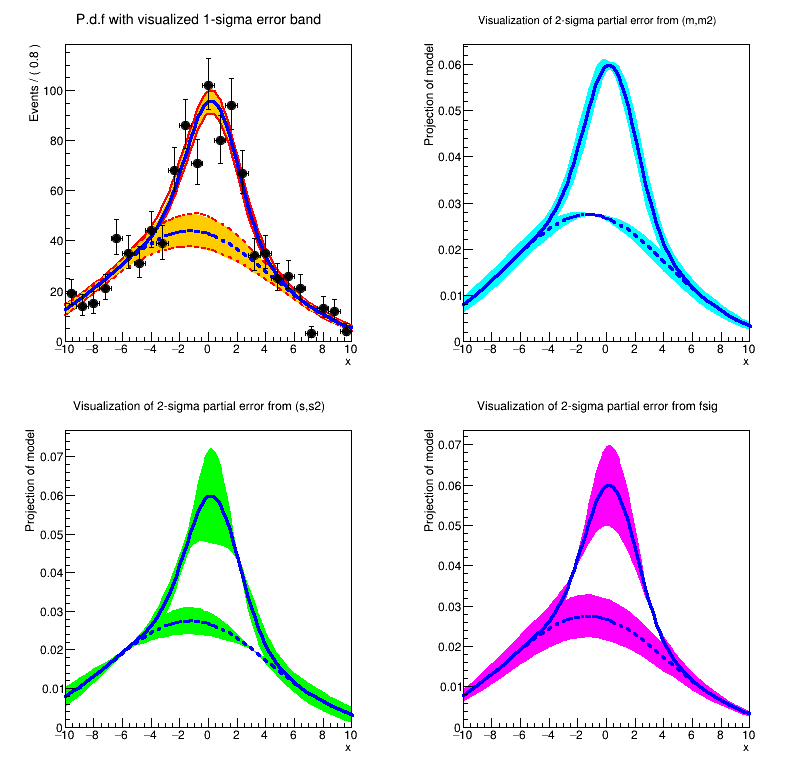

In [16]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()